First, load the data,in this notebook we are using the Moss data:
The new method only use 4 features while maintaining a good performance.

Consider to use LOOCV for this dataset since the sample size is very small.


In [1]:
import sys
sys.path.append('../../../Code')
import loadData 
import RunML
import RunML_continue
import FS
import metric

2025-01-27 00:27:22.201888: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 00:27:22.204197: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 00:27:22.207635: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 00:27:22.216710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737955642.232467 3835460 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737955642.23

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle
import matplotlib.pyplot as plt

### 1. Load the data and data preprocess
After reading the data, convert the abundance matrix into relative abundance matrix; 

In [3]:
df=pd.read_csv('../data/relative_abundance_df.csv',index_col = 0)
df

,Beijerinckiaceae,Mycobacteriaceae,Ktedonobacteraceae,Bryum argenteum var. argenteum,Burkholderiaceae,Micromonosporaceae,Opitutaceae,WD2101 soil group,Xanthobacteraceae,Chitinophagaceae,...,Marinifilaceae,Aerococcaceae,Acetobacterales Incertae Sedis,Bacteroidaceae,Hydrogenophilaceae,Arachis hypogaea var. vulgaris,Demequinaceae,Pseudohongiellaceae,Bacteroidetes vadinHA17,Thermoanaerobacteraceae
Sp1,57.894737,31.578947,10.526316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp2,1.448965,0.631692,0.039258,10.413990,6.381156,4.043540,4.025696,3.540328,3.404711,3.222698,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp4,1.247068,0.856460,0.017705,0.000000,4.564467,1.226043,1.406409,3.713540,6.305050,6.754304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp5,0.524455,1.700505,0.190711,0.131114,8.470738,2.789145,3.198379,5.602130,3.929437,3.579801,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp6,5.468805,80.751917,0.000000,0.000000,5.992825,0.000000,0.014068,0.000000,0.274319,0.235633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp7,2.525957,1.713743,0.005582,0.018142,4.873283,0.117227,1.646757,6.127889,2.756224,1.773752,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp8,2.184587,1.202563,1.198402,0.000000,17.023136,0.000000,0.890479,4.277630,5.629993,3.649301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp9,1.280438,0.458262,0.705364,0.000000,10.149160,4.834217,2.920298,4.506245,3.149429,3.037110,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sp10,7.142857,7.142857,4.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.844156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# target variable
y_data = pd.read_excel('../data/rawdata/Moss-classification.xlsx') 
print(y_data)
y = y_data.iloc[:,2].values
print(y)
print(pd.Series(y).value_counts())

      NO.                           Moss name classification(30)  Week 4  \
0    sp.1             Brachythecium Rutabulum               Good      33   
1    sp.2                  Platygyrium Repens                Bad       0   
2    sp.3            Bryoandersonia illecebra               Good      10   
3    sp.4                Aulacomnium Palustre                Bad       0   
4    sp.5                   Entodon seductrix               Good       0   
5    sp.6                    Hedwigia ciliata                Bad       0   
6    sp.7                  Leucobryum glaucum                Bad       0   
7    sp.8                   Sphagnum palustre                Bad       0   
8    sp.9                      Bryum argentum                Bad       0   
9   sp.10                Ceretodon purpureous                Bad       0   
10  sp.11                 Atrichum angustatum               Good      55   
11  sp.12                 Anomodon attenuates               Good       9   
12  sp.13   

In [5]:
ASVs = df.columns
ASVs

Index(['Beijerinckiaceae', 'Mycobacteriaceae', 'Ktedonobacteraceae',
       'Bryum argenteum var. argenteum', 'Burkholderiaceae',
       'Micromonosporaceae', 'Opitutaceae', 'WD2101 soil group',
       'Xanthobacteraceae', 'Chitinophagaceae',
       ...
       'Marinifilaceae', 'Aerococcaceae', 'Acetobacterales Incertae Sedis',
       'Bacteroidaceae', 'Hydrogenophilaceae',
       'Arachis hypogaea var. vulgaris', 'Demequinaceae',
       'Pseudohongiellaceae', 'Bacteroidetes vadinHA17',
       'Thermoanaerobacteraceae'],
      dtype='object', length=328)

In [6]:
Beijerinckiaceae_feature = pd.DataFrame({'ASV':df['Beijerinckiaceae'],'Y':y})
print(Beijerinckiaceae_feature)
FS.OTU_H_Score(df['Beijerinckiaceae'],y)

            ASV     Y
Sp1   57.894737  Good
Sp2    1.448965   Bad
Sp3    0.000000  Good
Sp4    1.247068   Bad
Sp5    0.524455  Good
Sp6    5.468805   Bad
Sp7    2.525957   Bad
Sp8    2.184587   Bad
Sp9    1.280438   Bad
Sp10   7.142857   Bad
Sp11   0.997030  Good
Sp12   0.683286  Good
Sp13   4.018762   Bad
Sp14   4.194349  Good
Sp15   1.897887   Bad
Sp16  20.714286  Good
Sp17  24.786325  Good


0.037037037037030984

### 2. Kruskal-Wallis H-test
The default p value of the function is 10%, the resulted index is ranked by its H statistics descendingly.

In [7]:
from scipy import stats
stats.chi2.ppf(1 - 0.1, 1) 

2.705543454095404

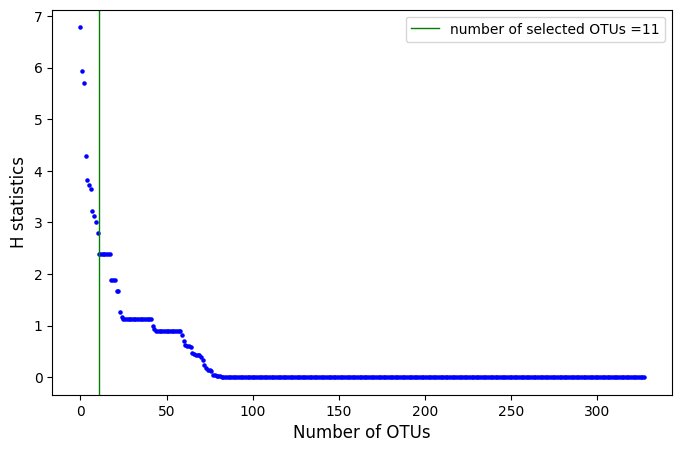

In [8]:
select_result = FS.SelectMicro_fun(df,y)

In [9]:
select_result.keys()
# abundance matrix--> relative abundance matrix (relative by sample, and delete that below 1%)


dict_keys(['selected_data', 'selected_columnames', 'selected_indices', 'relative_abundance_data', 'H_score'])

In [10]:
data=select_result['relative_abundance_data']
weights=select_result['H_score']#  H score for each OTU, the function will: 1. filter those below threshold (1%) to 0; 2. rank the data; calculate the H statistics
selectedOTU_index = select_result['selected_indices']
ASVs_selected= select_result['selected_columnames']
X_FS = select_result['selected_data']# the subset based on the method.

In [11]:
data
print(np.shape(data))

(17, 328)


In [12]:
eps = len(selectedOTU_index)
print(eps)

11


In [13]:
print(ASVs_selected)

Index(['Acetobacteraceae', 'Solibacteraceae (Subgroup 3)', 'Pedosphaeraceae',
       'Acidobacteriaceae (Subgroup 1)', 'Clostridiaceae 1', 'Isosphaeraceae',
       'Pseudomonadaceae', 'Gemmataceae', 'WD2101 soil group',
       'Acidothermaceae', 'Xanthomonadaceae'],
      dtype='object')


In [14]:
print(weights)
print(selectedOTU_index)

[0.03749655 0.46510329 0.60176991 0.42382271 0.14887794 0.05070843
 0.94009217 3.13444302 0.99415205 1.17057903 0.62117823 3.72616879
 0.58060109 0.         6.78480204 0.23502304 0.3908046  3.22105263
 0.11409396 0.4312369  0.88888889 0.14217443 0.01671583 0.
 1.68011696 5.94535519 0.88888889 0.45637584 0.69476373 0.60176991
 0.         0.         2.390625   0.01267711 0.81907571 0.
 0.         2.79412998 0.         0.         0.01671583 0.88888889
 4.2792527  0.         1.125      0.4312369  0.         0.
 0.         1.88888889 0.         5.70230608 1.26771066 0.
 0.         0.         2.390625   0.         1.67127496 0.
 0.         0.         0.33487227 0.         0.01671583 1.88888889
 0.         0.         0.         0.         0.88888889 0.
 0.         0.         0.         1.125      1.125      0.
 0.         0.88888889 0.         0.17463312 3.01385042 0.88888889
 0.         0.         0.88888889 0.         0.         0.
 0.         2.390625   0.         0.         0.         0.


In [15]:
# check the selected data (after normalization)
df_FS = pd.DataFrame(X_FS, columns=ASVs_selected)
df_FS['Y'] =y
print(df_FS.iloc[:,8:12].sort_values(by='Y'))

    WD2101 soil group  Acidothermaceae  Xanthomonadaceae     Y
8            0.045062         0.000000          0.000000   Bad
1            0.035403         0.000000          0.000000   Bad
14           0.078300         0.074772          0.000000   Bad
3            0.037135         0.000000          0.000000   Bad
5            0.000000         0.000000          0.000000   Bad
6            0.061279         0.041783          0.000000   Bad
7            0.042776         0.000000          0.000000   Bad
12           0.023312         0.022712          0.021866   Bad
9            0.000000         0.000000          0.000000   Bad
13           0.010623         0.000000          0.090786  Good
11           0.028007         0.000000          0.000000  Good
0            0.000000         0.000000          0.000000  Good
15           0.000000         0.000000          0.039286  Good
4            0.056021         0.000000          0.013151  Good
2            0.000000         0.000000          0.00000

In [16]:
Beijerinckiaceae_feature = pd.DataFrame({'ASV':df['Beijerinckiaceae'],'Y':y})
print(Beijerinckiaceae_feature)
x1 = df['Beijerinckiaceae']
FS.OTU_H_Score(x1,y)

            ASV     Y
Sp1   57.894737  Good
Sp2    1.448965   Bad
Sp3    0.000000  Good
Sp4    1.247068   Bad
Sp5    0.524455  Good
Sp6    5.468805   Bad
Sp7    2.525957   Bad
Sp8    2.184587   Bad
Sp9    1.280438   Bad
Sp10   7.142857   Bad
Sp11   0.997030  Good
Sp12   0.683286  Good
Sp13   4.018762   Bad
Sp14   4.194349  Good
Sp15   1.897887   Bad
Sp16  20.714286  Good
Sp17  24.786325  Good


0.037037037037030984

In [17]:
unique_groups = np.unique(y)
samples = [x1[np.array(y) == group] for group in unique_groups]
num_groups = len(unique_groups)# df = num_groups-1

print(samples)

[Sp2     1.448965
Sp4     1.247068
Sp6     5.468805
Sp7     2.525957
Sp8     2.184587
Sp9     1.280438
Sp10    7.142857
Sp13    4.018762
Sp15    1.897887
Name: Beijerinckiaceae, dtype: float64, Sp1     57.894737
Sp3      0.000000
Sp5      0.524455
Sp11     0.997030
Sp12     0.683286
Sp14     4.194349
Sp16    20.714286
Sp17    24.786325
Name: Beijerinckiaceae, dtype: float64]


### Model
Prepare 4 datasets: full dataset, our selected dataset, Lasso selected  dataset(based on the target variable), randomly selected data (selected the same numer of variables as in our method)

Use random forest, SVM, CatBoost and NB as classifier, and will build both models for each response variable.

For random selection, the  process will repeat iter=30 times to  find the mean accuracy and AUC


In [18]:
iter =30
cls = ["RF","SVM", "CatBoost","NB"]

In [21]:
targetLabel=y
print("The response variable and its counts are:")
print(pd.Series(targetLabel).value_counts())


The response variable and its counts are:
Bad     9
Good    8
Name: count, dtype: int64


In [22]:
X_lasso_ft,xlabel_lasso_ft  = RunML_continue.LassoFS_CV(data,targetLabel)

X_FS_lasso_ft,xlabel_FS_lasso_ft0  = RunML_continue.LassoFS_CV(X_FS,targetLabel)
xlabel_FS_lasso_ft = selectedOTU_index[xlabel_FS_lasso_ft0]

data_subset = {"AllFeatures":data,
               "SelectMicro": X_FS,
               "Lasso_finetune":X_lasso_ft,
               "FS_Lassofinetune":X_FS_lasso_ft,
               #"Random":data
              }

Best alpha: 0.1
Best alpha: 0.1


In [23]:
print(f'The shape of the original dataset is ',np.shape(data))
print(f'The shape of the SelectMicro dataset is ',np.shape(X_FS))
print(f'The shape of the Lasso_finetune selected dataset is ',np.shape(X_lasso_ft))
print(f'The shape of the FS_Lasso_finetune selected dataset is ',np.shape(X_FS_lasso_ft))

The shape of the original dataset is  (17, 328)
The shape of the SelectMicro dataset is  (17, 11)
The shape of the Lasso_finetune selected dataset is  (17, 11)
The shape of the FS_Lasso_finetune selected dataset is  (17, 4)


The  function will print out the accuracy and AUC for each dataset using each classifier, and also will return the y_actual, y_predict, y_predprob for future use.

In [24]:
dict_cm = RunML_continue.runClassifier_FScompare(data_subsets= data_subset,y= targetLabel,classifiers=cls,SMOTE=False)
print(metric.metric_sum(dict_cm))

Classes: ['Bad' 'Good']
[0.625, 0.5, 1.0, 0.5, 1.0]
[0.5, 0.25, 0.0, 0.5, 0.0]


TBB Warning: The number of workers is currently limited to 0. The request for 47 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



[0.5, 0.75, 1.0, 0.5, 1.0]
[0.5, 0.5, 0.75, 0.25, 1.0]
[0.875, 0.625, 1.0, 1.0, 1.0]
[0.5, 0.125, 0.5, 0.0, 0.0]
[0.875, 0.625, 0.5, 1.0, 1.0]
[0.625, 0.875, 0.5, 1.0, 1.0]
[0.875, 0.75, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 0.0]
[0.75, 1.0, 1.0, 1.0, 1.0]
[0.625, 1.0, 0.75, 1.0, 1.0]
[0.875, 0.625, 1.0, 1.0, 1.0]
[0.5, 0.625, 0.0, 0.0, 0.0]
[0.875, 0.625, 1.0, 1.0, 1.0]
[0.625, 0.875, 0.5, 1.0, 1.0]
                  RF_Accuracy  RF_AUC  RF_Accuracy_std  RF_AUC_std  RF_mcc   \
AllFeatures        0.533333     0.725     0.291548       0.229129       NaN   
SelectMicro        0.700000     0.900     0.214735       0.145774       NaN   
Lasso_finetune     0.833333     0.925     0.139443       0.100000   0.73094   
FS_Lassofinetune   0.700000     0.900     0.214735       0.145774       NaN   

                    RF_F    SVM_Accuracy  SVM_AUC  SVM_Accuracy_std  \
AllFeatures       0.360000    0.600000     0.250       0.226078       
SelectMicro       0.653333    0.833333     0.225       0.139

In [25]:
dict_cm2 = RunML_continue.runClassifier_FScompare(data_subsets= data_subset,y= targetLabel,classifiers=['xgboost'],SMOTE=False)
print(metric.metric_sum(dict_cm))

Classes: ['Bad' 'Good']
[0.875, 0.75, 0.25, 1.0, 1.0]
[0.75, 0.75, 0.25, 1.0, 1.0]
[0.875, 0.75, 0.25, 1.0, 1.0]
[0.75, 0.75, 0.25, 1.0, 1.0]
                  xgboost_Accuracy  xgboost_AUC  xgboost_Accuracy_std  \
AllFeatures              0.7           0.775           0.214735         
SelectMicro              0.7           0.750           0.214735         
Lasso_finetune           0.7           0.775           0.214735         
FS_Lassofinetune         0.7           0.750           0.214735         

                  xgboost_AUC_std  xgboost_mcc  xgboost_F  
AllFeatures          0.278388            NaN    0.653333   
SelectMicro          0.273861        0.43094    0.753333   
Lasso_finetune       0.278388        0.43094    0.753333   
FS_Lassofinetune     0.273861        0.43094    0.753333   
                           Accuracy  Precision   Recall   Specification  \
AllFeatures_RF             0.529412  0.545455   0.666667      0.375       
AllFeatures_SVM            0.588235  0.571

### compare the first 15 index by their present ratio

Validation passed: Dimensions are correct.
Good= 8, Bad = 9
                 OTU                presence_pos  presence_neg
0                 Acetobacteraceae      0.125       0.777778  
1     Solibacteraceae (Subgroup 3)      0.250       0.777778  
2                  Pedosphaeraceae      0.000       0.555556  
3   Acidobacteriaceae (Subgroup 1)      0.000       0.444444  
4                 Clostridiaceae 1      0.375       0.000000  
5                   Isosphaeraceae      0.250       0.777778  
6                 Pseudomonadaceae      0.500       0.111111  
7                      Gemmataceae      0.375       0.777778  
8                WD2101 soil group      0.500       0.777778  
9                  Acidothermaceae      0.000       0.333333  
10                Xanthomonadaceae      0.500       0.111111  


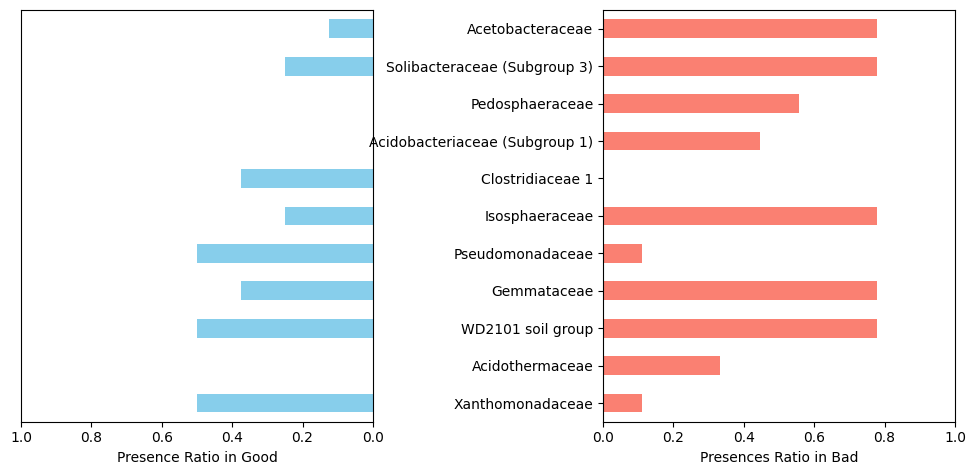

Validation passed: Dimensions are correct.
Good= 8, Bad = 9
                OTU               presence_pos  presence_neg
0               Beijerinckiaceae      0.500       1.000000  
1               Acetobacteraceae      0.125       0.777778  
2   Solibacteraceae (Subgroup 3)      0.250       0.777778  
3             Pseudonocardiaceae      0.250       0.000000  
4                   JG30-KF-CM45      0.250       0.000000  
5                Spirochaetaceae      0.500       0.333333  
6                        SC-I-84      0.125       0.000000  
7               Clostridiaceae 1      0.375       0.000000  
8               Pseudomonadaceae      0.500       0.111111  
9                 Rubritaleaceae      0.000       0.111111  
10              Cloacimonadaceae      0.000       0.111111  


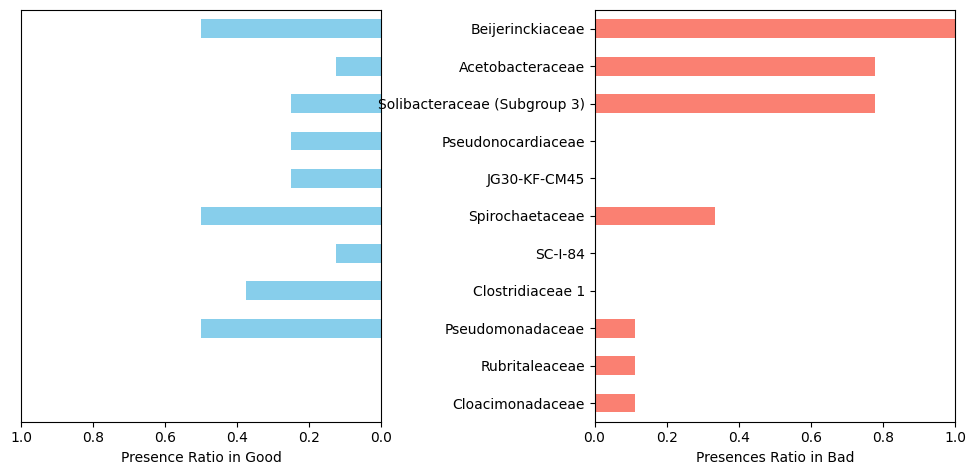

Validation passed: Dimensions are correct.
Good= 8, Bad = 9
               OTU               presence_pos  presence_neg
0              Acetobacteraceae      0.125       0.777778  
1  Solibacteraceae (Subgroup 3)      0.250       0.777778  
2              Clostridiaceae 1      0.375       0.000000  
3              Pseudomonadaceae      0.500       0.111111  


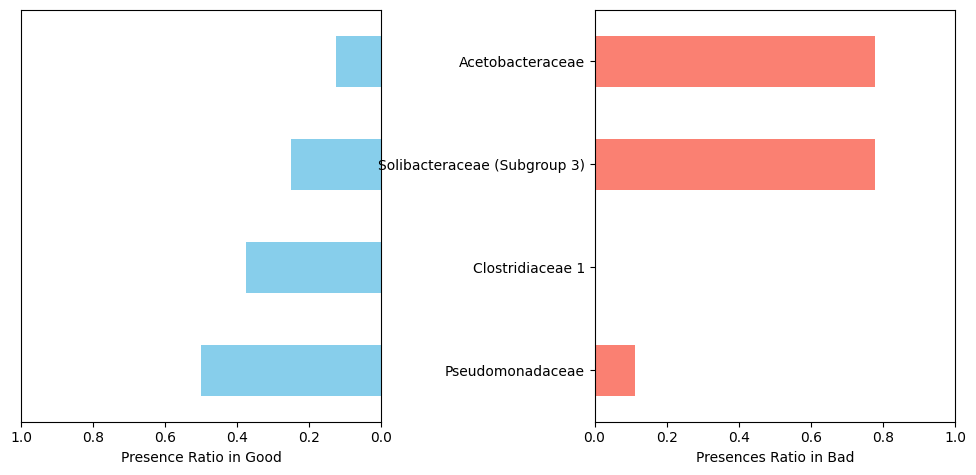

In [26]:
FS.plotPresenseRatio(X_FS,targetLabel,ASVs_selected,posLabel="Good",posText="Good",negText="Bad")
ASVs_selected_lasso_ft = ASVs[xlabel_lasso_ft]
FS.plotPresenseRatio(X_lasso_ft,targetLabel,ASVs_selected_lasso_ft,posLabel="Good",posText="Good",negText="Bad")
ASVs_selected_FS_lasso= ASVs[xlabel_FS_lasso_ft]
FS.plotPresenseRatio(X_FS_lasso_ft,targetLabel,ASVs_selected_FS_lasso,posLabel="Good",posText="Good",negText="Bad")


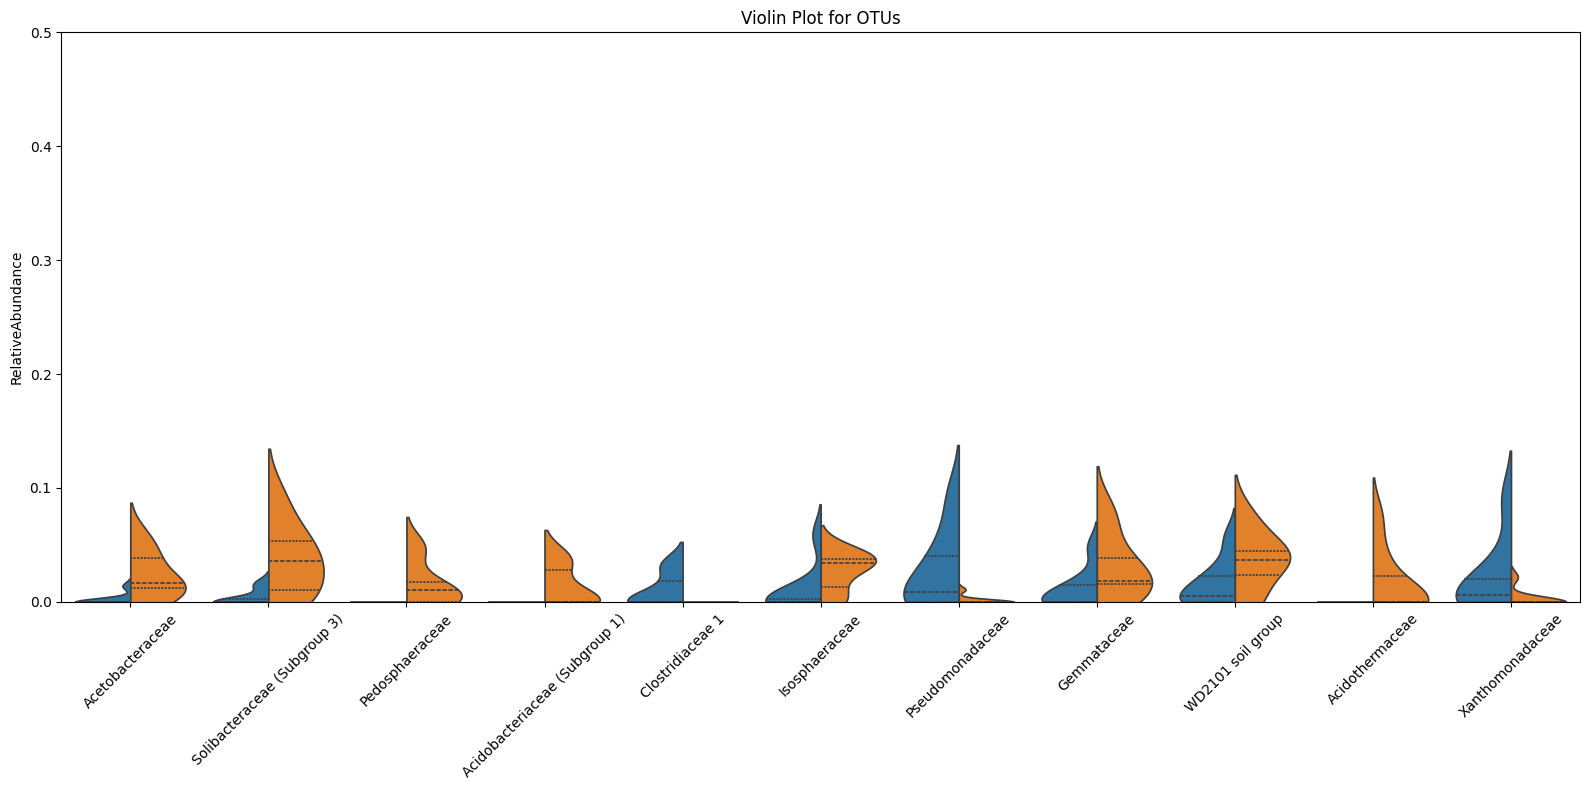

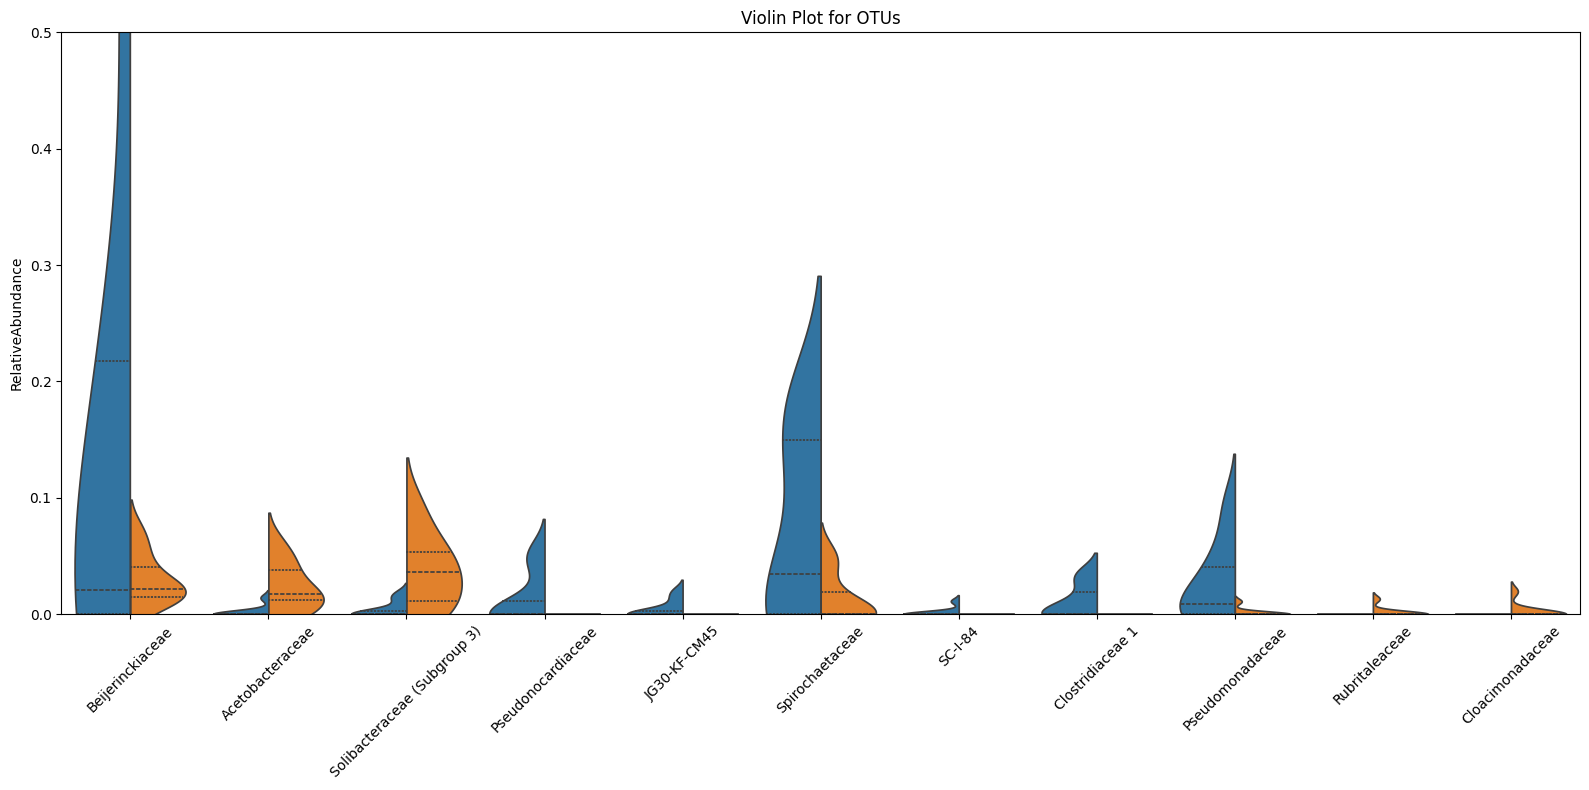

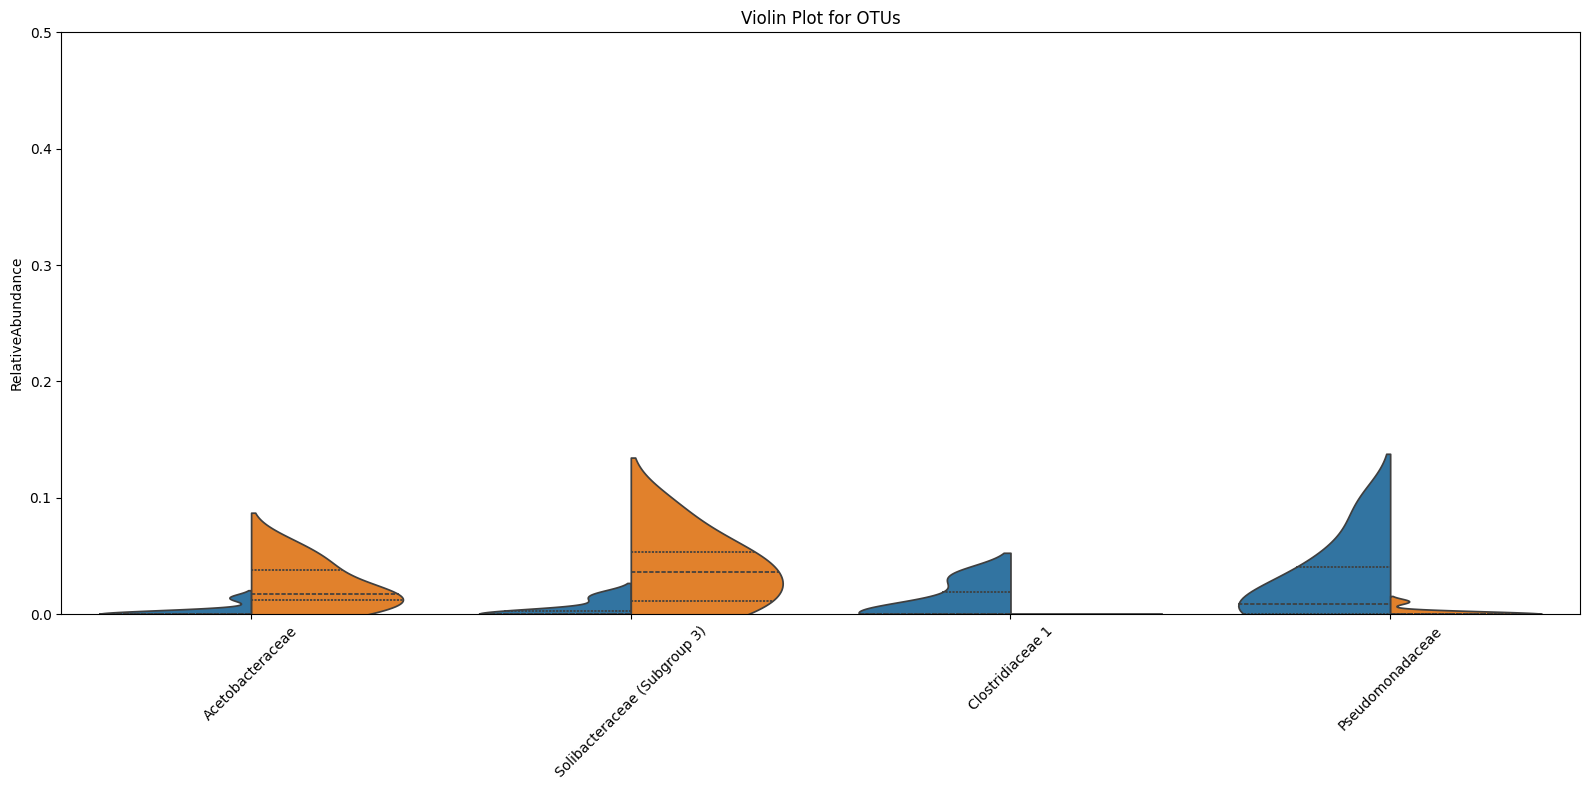

In [27]:
FS.OTUviolin(X_FS,y,ASVs_selected,y_max=0.5)

FS.OTUviolin(X_lasso_ft,y,ASVs_selected_lasso_ft,y_max=0.5)
FS.OTUviolin(X_FS_lasso_ft,y,ASVs_selected_FS_lasso,y_max=0.5)

### Fisher_discriminant_ratio

The Fisher Discriminant Ratio is a measure used in statistics and machine learning to evaluate the separability between two or more classes. It is commonly used in Linear Discriminant Analysis (LDA) to reduce dimensionality while preserving as much of the class discriminatory information as possible.

Fisher's Criterion / Fisher's Discriminant Ratio
Fisher's discriminant ratio evaluates how well the classes can be separated based on the ratio of the between-class scatter matrix to the within-class scatter matrix.

In [28]:
for datatype, subset in data_subset.items():
    print(f"f1 of {datatype} = {metric.fisher_discriminant_ratio(subset,targetLabel)}")
    

f1 of AllFeatures = 0.05225948431766917
f1 of SelectMicro = 0.2895098416197174
f1 of Lasso_finetune = 0.18582113453590327
f1 of FS_Lassofinetune = 0.4212002708775608


In [29]:
# calculate the combined AUC (the samples in each split is very small, which will cause averaged AUC not reliable)
predicted_list = []

    # Iterate over the first level of the dictionary: key1 = datatype, key2 = model
for key1, sub_dict in dict_cm.items():
    # Iterate over the second level of the dictionary
    for key2, value in sub_dict.items():
        predicted_list.append(((f"{key1}_{key2}"), value))



first_values = [item[0] for item in predicted_list]
names = first_values


second_values = [item[1] for item in predicted_list]
print(second_values)
actual_list = []
for i in range(len(second_values)):
    actual = second_values[i][0]
    actual = np.array([1 if label == 'Good' else 0 for label in actual])
    print(actual)
    actual_list.append(actual)

predict_list = []
for i in range(len(second_values)):
    predict = second_values[i][2]
    print(predict)
    predict_list.append(predict)

# List to store metric results
combine_AUClist = []
from sklearn.metrics import roc_auc_score
for i in range(len(second_values)):
    AUC = roc_auc_score(actual_list[i], predict_list[i])
    combine_AUClist.append(result)

[array([[1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 1.  ],
       [1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.62, 0.68, 0.4 , 0.68, 0.42, 0.18, 0.53, 0.49, 0.25, 0.32, 0.31,
        0.51, 0.35, 0.42, 0.45, 0.28, 0.53]]), array([[1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.46627083, 0.46892076, 0.45958708, 0.4665867 , 0.23140939,
        0.7580615 , 0.22692525, 0.102521  , 0.4558549 , 0.45269853,
        0.45431764, 0.89274704

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

### feature selection in each fold